In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Exercise 6.1 (Bayesian Inference with SNIS)

In this exercise, we will use our toy Gaussian model to perform Bayesian inference. We will use the same model as in **Example 3.6**. Recall that this model is given as:

- `p(x) = N(x; mu_0, sigma_0^2)`
- `p(y_i | x) = N(y_i; x, sigma^2)`

where `i = 1, ..., M`, i.e., `y_i` are conditionally independent given `x`.

In the first implementation of this exercise, you can set `mu_0 = 0`, `sigma^2 = 1`, and `sigma_0^2 = 1`, but you should also explore other parameters to gain intuition.

### Instructions

1. **Simulate Data**  
   - Simulate `M = 1000` data points from this model.  
   - Perform `X ~ p(x)` and then fix the sample `X = x`.  
   - For `i = 1, ..., M`, sample `y_i ~ p(y_i | x)`.


In [5]:
N = 1000
mu_0 = 0
sigma_0, sigma = 1, 1

rng = np.random.default_rng(25)
x = rng.normal(mu_0, sigma_0)
y = rng.normal(x, sigma, N)
y[0:10]

array([ 0.34907432, -0.17755834, -1.92252678,  0.37275506,  1.2814085 ,
        1.3973744 , -0.18215838,  2.58340351,  2.29773166,  0.12581353])

2. For these particular datapoints, compute the true posterior mean estimate using the
expression `µp` in Example 3.6. This is the true posterior mean estimate for this model.

In [4]:
mean = (sigma_0**2 * np.sum(y) + sigma**2 * mu_0) / (sigma_0**2 * N + sigma**2)
mean

0.3938362645431516

3. Estimating the Posterior Mean with SNIS

Now we will use Self-Normalized Importance Sampling (SNIS) to estimate the posterior mean. For this, we will use the following proposal distribution:

- `q(x) = N(x; mu_q, sigma_q^2)`

In the first implementation, you can set `mu_q = 0` and `sigma_q^2 = 1`, but you should also explore other parameters to gain intuition.

### Instructions

1. **Implement the SNIS Estimator**  
   - Note that the unnormalized posterior is given by:  
     ```
     p_bar(x | y1:n) = p(y1:n | x) * p(x) = (Product from i=1 to M of p(y_i | x)) * p(x)
     ```
     as described in Exercise 3.6.  

2. **Compute Weights in the Log-Domain**  
   - Implement the SNIS estimator for this model.  
   - Compute the weights both without using the log-trick and with the log-trick.

3. **Compare the Results**  
   - Compare the posterior mean estimates obtained using the two methods.  
   - Observe that the log-trick is necessary to handle numerical stability in this model.


In [8]:
# define log prior
def logp(x):
    return -x**2/2 - np.log(np.sqrt(2*np.pi))

# define log likelihood
def loglik(x, y):
    return -(x-y)**2/2 - np.log(np.sqrt(2*np.pi))

# define log proposal
def logq(x):
    return -x**2/2 - np.log(np.sqrt(2*np.pi))

def ESS(w):
    return 1/np.sum(w**2)

N = 10000

x = rng.normal(0, 1, N) # sample from q(x)

logW = np.zeros(N)
for i in range(N):
    logW[i] = np.sum(loglik(x[i], y)) + logp(x[i]) - logq(x[i])

log_hat_W = logW - np.max(logW)

def ws(N):
    x = rng.normal(0, 1, N) # sample from q(x)
    logW = np.zeros(N)
    for i in range(N):
        logW[i] = np.sum(loglik(x[i], y)) + logp(x[i]) - logq(x[i])
    log_hat_W = logW - np.max(logW)
    return np.exp( log_hat_W )/np.sum(np.exp( log_hat_W )) # weights with log-trick

w = ws(N) # weights with log-trick
w2 = np.exp(logW)/np.sum(np.exp(logW)) # weights without logtrick


# mean estimate
mean = np.sum(w*x)
mean2 = np.sum(w2*x)

print("Mean estimate (stable): ", mean)
print("ESS: ", ESS(w))
print("Mean estimate (unstable): ", mean2)
print("ESS (unstable): ", ESS(w2))

Mean estimate (stable):  -0.014113945129087459
ESS:  425.4565324581858
Mean estimate (unstable):  nan
ESS (unstable):  nan


/tmp/ipykernel_2281/3132102560.py:35: RuntimeWarning: invalid value encountered in divide
  w2 = np.exp(logW)/np.sum(np.exp(logW)) # weights without logtrick


4. Finally compute effective sample size (ESS) and vary your N to see how it affects the
ESS. Plot the ESS w.r.t. N.

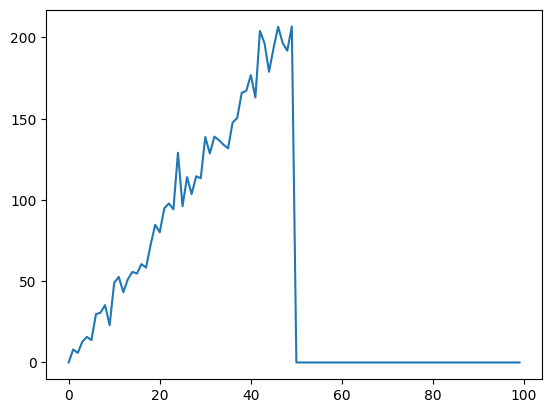

In [17]:
ess = np.zeros(100)
for i in range(1, 50):
    ess[i] = ESS(ws(100 * i))

plt.plot(ess)